<a href="https://colab.research.google.com/github/Himanshusahu1508/Funnel-Analysis/blob/main/Data_Analysis_Case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Funnel Analysis:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("food_delivery_case_study.csv")

In [ ]:
df.shape

(1000, 12)

In [ ]:
df.head()

,user_id,city,device_type,signup_date,Signup,Browse,Add_to_Cart,Payment,Order_Placed,Delivered,delivery_time_min,order_value
0,1,Delhi,Android,2025-07-01 00:00:00,1,1,0,0,0,0,NaN,NaN
1,2,Mumbai,Android,2025-07-01 01:00:00,1,1,1,1,1,1,23.184229,430.559383
2,3,Hyderabad,Android,2025-07-01 02:00:00,1,1,1,1,0,0,NaN,NaN
3,4,Delhi,iOS,2025-07-01 03:00:00,0,0,0,0,0,0,NaN,NaN
4,5,Delhi,Android,2025-07-01 04:00:00,0,0,0,0,0,0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            1000 non-null   int64  
 1   city               1000 non-null   object 
 2   device_type        1000 non-null   object 
 3   signup_date        1000 non-null   object 
 4   Signup             1000 non-null   int64  
 5   Browse             1000 non-null   int64  
 6   Add_to_Cart        1000 non-null   int64  
 7   Payment            1000 non-null   int64  
 8   Order_Placed       1000 non-null   int64  
 9   Delivered          1000 non-null   int64  
 10  delivery_time_min  249 non-null    float64
 11  order_value        249 non-null    float64
dtypes: float64(2), int64(7), object(3)
memory usage: 93.9+ KB


In [ ]:
stages = ["Signup","Browse","Add_to_Cart","Payment","Order_Placed","Delivered"]

In [ ]:
funnel_counts = df[stages].sum()
funnel_conversion  = funnel_counts/len(df)

In [ ]:
print(funnel_counts)
print(funnel_conversion)

Signup          801
Browse          656
Add_to_Cart     524
Payment         409
Order_Placed    333
Delivered       249
dtype: int64
Signup          0.801
Browse          0.656
Add_to_Cart     0.524
Payment         0.409
Order_Placed    0.333
Delivered       0.249
dtype: float64


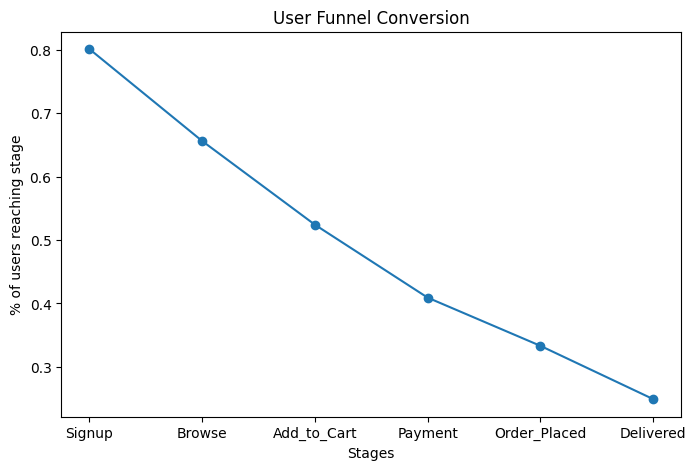

In [ ]:
# Plot funnel drop-off
plt.figure(figsize = (8,5))
plt.plot(stages, funnel_conversion, marker = "o")
plt.xlabel("Stages")
plt.title("User Funnel Conversion")
plt.ylabel("% of users reaching stage")
plt.show()

This funnel drop of plot show that we have linearly decreasing conversion of people from one stage to other and
The retention rate is higher if the person reaches payment stage

In [ ]:
#Funnel by city
city_funnel = df.groupby("city")[stages].mean()
print("City-wise Funnel Conversion: ")
print(city_funnel)

City-wise Funnel Conversion: 
             Signup    Browse  Add_to_Cart   Payment  Order_Placed  Delivered
city                                                                         
Bangalore  0.826087  0.700000     0.508696  0.369565      0.304348   0.230435
Delhi      0.745690  0.607759     0.487069  0.400862      0.318966   0.241379
Hyderabad  0.813953  0.666667     0.534884  0.414729      0.352713   0.251938
Mumbai     0.814286  0.650000     0.557143  0.442857      0.350000   0.267857


In [ ]:
import seaborn as sns


<Axes: xlabel='city'>

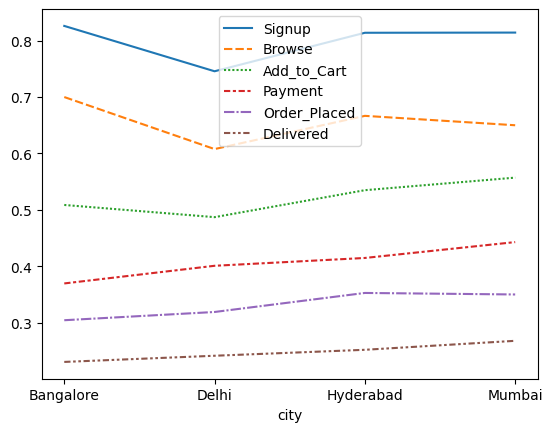

In [ ]:
sns.lineplot(city_funnel)
#From this plot we can see that different  cities have different costumer drops but they are almost in same ranges
#here,

In [ ]:
#Delivery time analysis
df["delivery_time_min"].mean()
delivery_time = df.groupby("city")["delivery_time_min"].mean()

In [ ]:
delivery_time

,delivery_time_min
city,
Bangalore,40.966629
Delhi,38.223805
Hyderabad,38.720460
Mumbai,40.128879


In [ ]:
stage_counts = df[stages].sum()
stage_prev = stage_counts.shift(1)
conversion_stage_to_stage = stage_counts / stage_prev
conversion_stage_to_stage.iloc[0] = 1  # first stage always 100%
conversion_stage_to_stage


,0
Signup,1.000000
Browse,0.818976
Add_to_Cart,0.798780
Payment,0.780534
Order_Placed,0.814181
Delivered,0.747748
